

# Project: Analysing Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project, we will be performing exploratory analysis on movies dataset collected from The Movies Database(TMDb). The dataset includes 10886 unique movies with 21 columns released from 1960 to 2015. Some of the columns include; id, popularity,budget, revenue, original title, cast, homepage, director, tagline, overview, runtime, genres,production companies, release date,vote counts, vote average, Adjusted budget and adjusted revenue.

### Questions for Analysis
>We will be using the following questions to explore the dataset and provide insights to stakeholders;
###### Which genres, movie and actors are more popular?
###### Which movie genre are more profitable to produce?
###### What properties are associated with movies with high revenue?
###### Does movie popularity influence its profit?


 ##### Import the dataset and all necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> In this section, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 


In [3]:
# Load data and print out a few lines. Perform operations to inspect data

pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df=pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# undrestand the dataset more by checking data types and summaries
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
> Looking at our dataset we see that they are columns that are not useful to our business questions so we are going to perform data transformation which involves deleting irrelevant columns, renaming some columns, moving, and splitting columns, changing data types removing duplicates and Null values to get a consistent and clean dataframe.
We will start by assessing the data
 

In [6]:
# Find the number of samples in the dataset
df.shape

(10866, 21)

In [7]:
# Check for duplicate data 
df.duplicated().sum()

1

In [8]:
# Drop duplicate and check again
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
# check for Null values
df.isnull().sum()
# That's a lot of nulls, I'll have to clean columns first!

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [10]:
#  Drop irrelevant columns and check
df.drop(['imdb_id','homepage','director','tagline','keywords','overview','production_companies'],axis=1, inplace=True)


In [11]:
# Find the number of non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
id                10865 non-null int64
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [12]:
# Seeing that the 'genres' and 'cast' columns still have null values, we are going to drop them
df.dropna(inplace=True)

In [13]:
# Check column consistency again
df.info()
# Now the enties are consistent!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10767 entries, 0 to 10865
Data columns (total 14 columns):
id                10767 non-null int64
popularity        10767 non-null float64
budget            10767 non-null int64
revenue           10767 non-null int64
original_title    10767 non-null object
cast              10767 non-null object
runtime           10767 non-null int64
genres            10767 non-null object
release_date      10767 non-null object
vote_count        10767 non-null int64
vote_average      10767 non-null float64
release_year      10767 non-null int64
budget_adj        10767 non-null float64
revenue_adj       10767 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [14]:
# Now I'll create a new column 'profit' to help calculate profitability.
df['profit']=df['revenue']-df['budget']
df.head(1)

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810


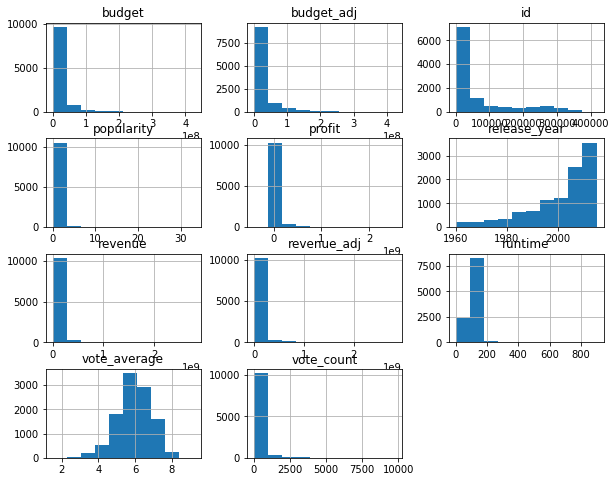

In [15]:
df.hist(figsize=(10,8));

##### The major reasons people produce movies is to make profit and gain popularity so those are going to be our dependent variables.
##### I can see that most of the variables are skewed to the right except for release year where more movies were released between 2000 to 2015. 

##### In the summary statistics above I can see that minimum runtime, budget and revenue is 0, that cannot be so I am going to replace those zeros with the mean runtime, budget and revenue respectively.

In [16]:
# Check how may runtime rows are '0'
df.query('runtime==0').count()

id                30
popularity        30
budget            30
revenue           30
original_title    30
cast              30
runtime           30
genres            30
release_date      30
vote_count        30
vote_average      30
release_year      30
budget_adj        30
revenue_adj       30
profit            30
dtype: int64

In [17]:
# Check Runtime mean
df.runtime.mean()

102.41339277421751

In [18]:
# Define mean to use in the next cell
mean_0=df['runtime'].mean()

In [19]:
# change runtime values that are '0' to the mean value
df.loc[df["runtime"] ==0, "runtime"]=mean_0 

In [20]:
# Check if it worked
df.query('runtime==0').count()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
profit            0
dtype: int64

In [21]:
# Check the number of values in 'budget' that are '0'
df.query('budget==0').count()

id                5610
popularity        5610
budget            5610
revenue           5610
original_title    5610
cast              5610
runtime           5610
genres            5610
release_date      5610
vote_count        5610
vote_average      5610
release_year      5610
budget_adj        5610
revenue_adj       5610
profit            5610
dtype: int64

In [22]:
# That's a lot, if I drop these rows we,ll loose more than half of the data
# so i'll just fill them with the mean value
# i am defining the mean value in this cell
df.budget.mean()
mean_b=df['budget'].mean()

In [23]:
# Replace the '0' with the mean
df.loc[df["budget"] ==0, "budget"]=mean_b
df.query('budget==0').count()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
profit            0
dtype: int64

In [24]:
# Repeat same operation on the revenue column to replace the '0' with the mean value
df.revenue.mean()
mean_r=df['revenue'].mean()

In [25]:
# Repeat same operation on the revenue column to replace the '0' with the mean value
df.loc[df["revenue"] ==0, "revenue"]=mean_r
df.query('revenue==0').count()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
profit            0
dtype: int64

In [26]:
# Let's checkout what we got!
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,10767.000000,10767.000000,1.076700e+04,1.076700e+04,10767.000000,10767.000000,10767.000000,10767.000000,1.076700e+04,1.076700e+04,1.076700e+04
mean,65477.144144,0.650924,2.244338e+07,6.229274e+07,102.698746,219.137364,5.967549,2001.283459,1.770705e+07,5.183338e+07,2.543078e+07
std,91703.303390,1.003565,2.810549e+07,1.114627e+08,30.428165,577.964702,0.931426,12.815909,3.442339e+07,1.452125e+08,9.699941e+07
min,5.000000,0.000065,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10559.500000,0.209957,1.475532e+07,4.018610e+07,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,20423.000000,0.386062,1.475532e+07,4.018610e+07,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,74507.500000,0.719253,1.600000e+07,4.018610e+07,112.000000,147.000000,6.600000,2011.000000,2.103337e+07,3.432264e+07,9.748210e+06
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


# # # # # #  The data is now clean and ready for exploration.

<a id='eda'></a>
## Exploratory Data Analysis

>  Now that I've trimmed and cleaned your data, moving on to exploration. where I will **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. 



###  Question 1: Which genres, movies titles and actors are more popular?

##### To answer our first question we need to expand the genres column 
##### so each genre can be represented separately in the statistical calculations.

In [27]:
# Split genres column
df1=df.assign(genres=df.genres.str.split('|')).explode('genres')
df1.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124.0,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124.0,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124.0,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124.0,Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120.0,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354


In [28]:
df_genpop = df1.groupby(['genres'],as_index=False)['popularity'].mean().sort_values(by=['popularity'])
df_genpop

,genres,popularity
5,Documentary,0.187389
9,Foreign,0.192131
16,TV Movie,0.270896
11,Horror,0.465357
12,Music,0.489556
10,History,0.580344
19,Western,0.590615
14,Romance,0.592082
6,Drama,0.592279
3,Comedy,0.593553


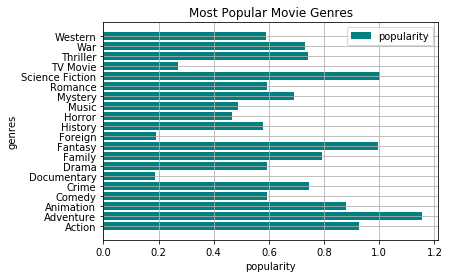

In [29]:
# Let's see the popularity of each genre on a bar chart

x1=df_genpop['genres']
y1=df_genpop['popularity']
plt.barh(x1,y1,color="teal",label='popularity')
plt.title('Most Popular Movie Genres')
plt.legend()
plt.xlabel('popularity')
plt.ylabel('genres')
plt.grid('True');

#####     From the graph above, we can see that the most popular movie genre is Adventure followed by science fiction and fantasy.
#####    Now let's check for the most popular movie title in the dataset.

In [30]:
# Grouping popularity counts by movies.
# Note that otpop stands for original title popularity
df_otpop = df[['original_title','popularity']].sort_values(by='popularity',ascending=False).head(20)
df_otpop

,original_title,popularity
0,Jurassic World,32.985763
1,Mad Max: Fury Road,28.419936
629,Interstellar,24.949134
630,Guardians of the Galaxy,14.311205
2,Insurgent,13.112507
631,Captain America: The Winter Soldier,12.971027
1329,Star Wars,12.037933
632,John Wick,11.422751
3,Star Wars: The Force Awakens,11.173104
633,The Hunger Games: Mockingjay - Part 1,10.739009


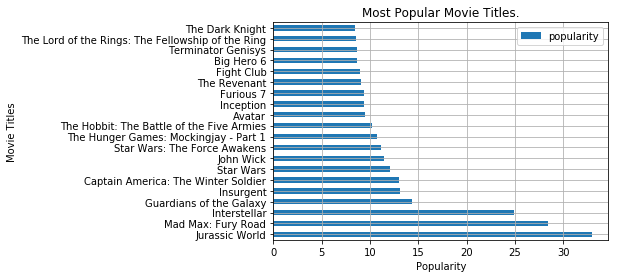

In [31]:
df_otpop.set_index('original_title').plot(kind='barh')

plt.title('Most Popular Movie Titles.')
plt.xlabel('Popularity')
plt.ylabel('Movie Titles')
plt.grid('true')

##### The most popular movie in the dataset is Jurassic World, followed by Mad Max: Fury Road and Intersteller

##### Let's see movies with the highest popularity  as well as the highest total popularity for the last 15 years.

In [32]:
from matplotlib import gridspec
def each_year_best(col_name, size=15):
        #this function plot the last 15 years best given varible 
        release = df1[['release_year',col_name,'original_title']].sort_values(['release_year',col_name],
                                                                               ascending=False)
        # group by release year and find the best profit for each year
        release = pd.DataFrame(release.groupby(['release_year']).agg({col_name:[max,sum],
                                                                      'original_title':['first'] })).tail(size)
        #select the max from given column
        x_max = release.iloc[:,0]
        #select the sum from given column
        x_sum = release.iloc[:,1]
         #select the name title
        y_title = release.iloc[:,2]
        #select the index
        r_date = release.index  
        #plot the desirible variable
        fig = plt.figure(figsize=(12, 6))
        gs = gridspec.GridSpec(1, 2, width_ratios=[2, 2]) 
        ax0 = plt.subplot(gs[0])
        ax0 = sns.barplot(x=x_max, y=y_title, palette='deep')
        for j in range(len(r_date)):
            #put the year information on the plot
            ax0.text(j,j*1.02,r_date[j], fontsize=12, color='black')
        plt.title('Last ' +str(size)+ ' years highest ' +col_name+ ' movies for each year')
        plt.xlabel(col_name.capitalize())
        plt.ylabel('')
        ax1 = plt.subplot(gs[1])
        ax1 = sns.barplot(x=r_date, y=x_sum, palette='deep')
        plt.xticks(rotation=90) 
        plt.xlabel('Release Year')
        plt.ylabel('Total '+col_name.capitalize())
        plt.title('Last ' +str(size)+ ' years total '+ col_name)
        plt.tight_layout()

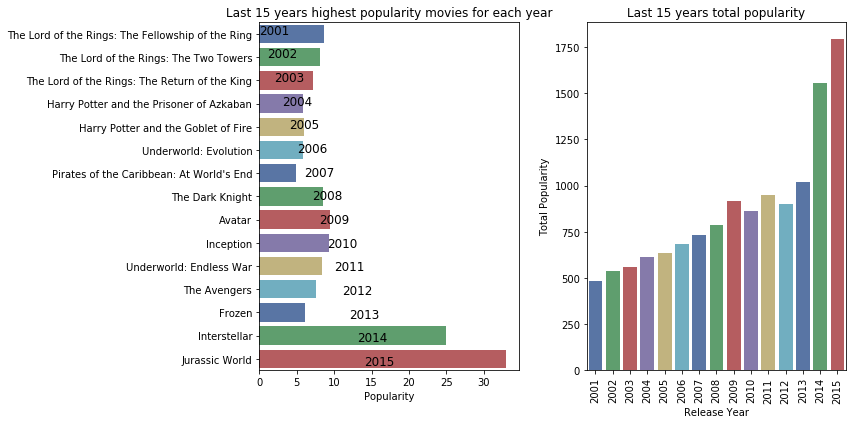

In [33]:
each_year_best('popularity')

##### 2015 has the highest total popularity and Jurassic world(still produced in 2015) has the highest popularity

In [34]:
# Split genres column
df2=df1.assign(cast=df1.cast.str.split('|')).explode('cast')
df2.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt,124.0,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Bryce Dallas Howard,124.0,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Irrfan Khan,124.0,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Vincent D'Onofrio,124.0,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Nick Robinson,124.0,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395065 entries, 0 to 10865
Data columns (total 15 columns):
id                395065 non-null int64
popularity        395065 non-null float64
budget            395065 non-null float64
revenue           395065 non-null float64
original_title    395065 non-null object
cast              395065 non-null object
runtime           395065 non-null float64
genres            395065 non-null object
release_date      395065 non-null object
vote_count        395065 non-null int64
vote_average      395065 non-null float64
release_year      395065 non-null int64
budget_adj        395065 non-null float64
revenue_adj       395065 non-null float64
profit            395065 non-null int64
dtypes: float64(7), int64(4), object(4)
memory usage: 48.2+ MB


In [36]:
df2.cast.value_counts(5)

Samuel L. Jackson    0.001855
Bruce Willis         0.001590
Nicolas Cage         0.001549
Eddie Murphy         0.001326
Robert De Niro       0.001311
                       ...   
Arielle Holmes       0.000003
Amir Hasan           0.000003
Rafael Martinez      0.000003
Ed Ackerman          0.000003
Joseph Williamson    0.000003
Name: cast, Length: 18983, dtype: float64

#####   So the top 3 actors on this dataset are Samuel L. Jackson, Bruce Willis and Nicholas Cage

## Question 2: Which movie genres are most profitable to produce?

In [37]:
df_genpro = df1.groupby(['genres'],as_index=False)['profit'].mean().sort_values(by=['profit']);

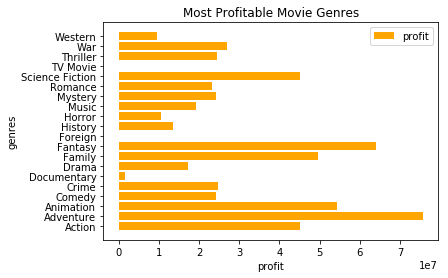

In [38]:
x1=df_genpro['genres']
y1=df_genpro['profit']
plt.barh(x1,y1,color="orange",label='profit')
plt.title('Most Profitable Movie Genres')
plt.legend()
plt.xlabel('profit')
plt.ylabel('genres');

##### From the graph above, we can see that adventure movies are the most profitable, followed by animation and science fiction. And the least profitable movies are TV movies, foreign movies and documentary

##### Now Let's see movies with the highest profit  as well as the highest total profit for the last 15 years.

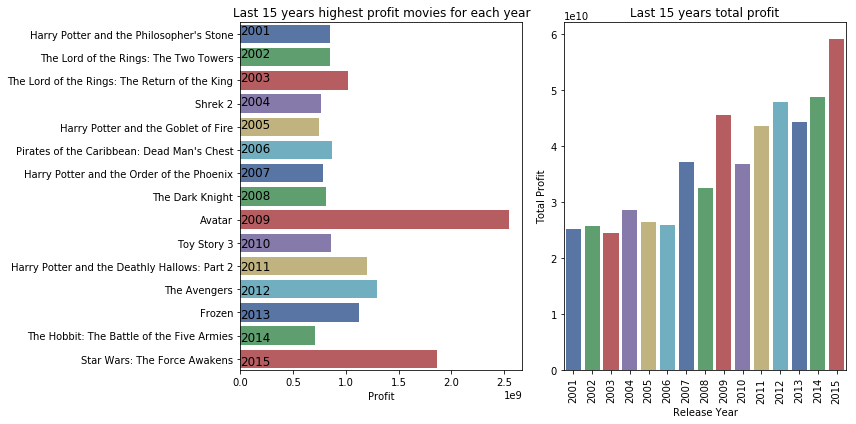

In [39]:
each_year_best('profit')


##### 2015 has the highest total profit and Avatar made the highest profit in the last 15 years.

## Question 3: What properties are associated with movies with high revenue?

In [41]:
df.revenue.describe()


count    1.076700e+04
mean     6.229274e+07
std      1.114627e+08
min      2.000000e+00
25%      4.018610e+07
50%      4.018610e+07
75%      4.018610e+07
max      2.781506e+09
Name: revenue, dtype: float64

##### So the revenue percentiles are all the same I guess this is because I filled over 5k rows with the mean
##### I am  going to be judging revenue by profit made instead

In [42]:
# Let's categorize the profit column to get more insights
bin_edges=[-4.139124e+08, 1.403010e+07, 2.543078e+07, 2.872977e+07, 2.544506e+09]
bin_names = ['low','medium','moderate-high', 'high']
df1['profit']=pd.cut(df['profit'], bin_edges, labels=bin_names)
df1.head(2)

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124.0,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,high
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124.0,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,high


In [43]:
# Let's see some variables that are associated with the four categories of profit
profit_pop_score =df1.groupby(['profit'],as_index=False)['popularity','runtime','vote_count','vote_average','budget'].mean().sort_values(by=['profit'])
profit_pop_score 

,profit,popularity,runtime,vote_count,vote_average,budget
0,low,0.423129,100.425495,74.748922,5.836666,1.712174e+07
1,medium,0.806205,107.434393,263.044825,6.163733,2.470337e+07
2,moderate-high,0.813047,111.933921,246.273128,6.195595,2.064829e+07
3,high,1.790473,112.797305,933.150529,6.339519,5.482086e+07



##### From the above, we can see that movies with high profit are characterized by a high investment,a runtime of over 100 minutes, they are aso highly popular with a gigantic votecount.

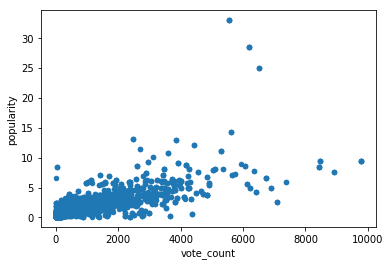

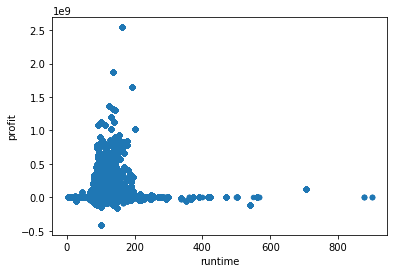

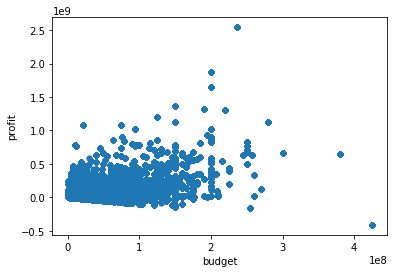

In [44]:
# I'll plot some variables shown above to find their relationship
df1.plot(x='vote_count', y='popularity', kind='scatter')
df2.plot(x='runtime', y='profit', kind='scatter')
df2.plot(x='budget', y='profit', kind='scatter');


###### From the plots above I can see that popularity and vote count are highly correlated which makes sense because a popular movie gets more vote counts since many people have seen it. This however does not imply causation since other factors may be responsible for the movie's popularity.
###### The second plot shows that profit and runtime have no correlation whatsoever as they are both moving in different directions
###### The third plot shows that movies with high budget are likely to make higher profit than movies with low budget even though budget is not directly responsible for profit.

  ## Question 4: Does movie popularity influence its profit?

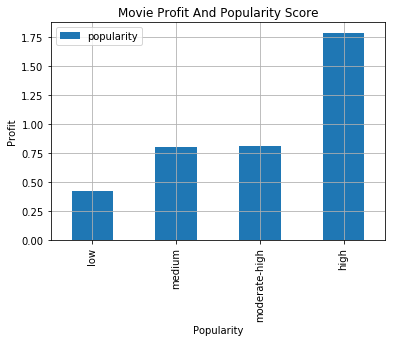

In [45]:
# Lets group profit and popularity score and plot it
df_profit=df1.groupby(['profit'],as_index=False)['popularity'].mean().sort_values(by=['profit'])
df_profit.set_index('profit').plot(kind='bar')

plt.title('Movie Profit And Popularity Score')
plt.xlabel('Popularity')
plt.ylabel('Profit')
plt.grid('true')

###### From the graph above it is obvious that movies with high profit are equally very popular . 

<a id='conclusions'></a>
## Conclusions

#####  From our dataset, the stakeholders will be movie producers looking to produce a new movie and have sought for insights concerning profitability, runtime, popularity and budgeting to enable them produce an outstanding movie.

#####  From the analysis we can conclude that;

#####  >>>The most popular movie genres is Adventure, followed by science fiction and fantasy,  And the least profitable movie genres are TV movies, foreign movies and documentary
#####  >>>The 3 most popular actors are Samuel L. Jackson, Bruce Willis and Nicholas Cage.
#####  >>>The 3 most popular movies in the dataset are Jurassic world,Mad Max: Fury Road and Intersteller


#####  >>>It is more profitable to produce adventure, animation and science fiction genres
#####  >>>Movies with high revenue are characterized by ***high investment, ***a runtime of over a 100 minutes, ***they are also highly popular among viewers with  a ***high rating score.

#####  >>>popularity influences profit in a way because the more popular a movie gets, the more people download or purchase it leading to increased profit. Note that popularity is not totally responsible for increase in profit.

###### >>> Popularity and vote count are highly correlated which makes sense because a popular movie gets more vote counts since many people have seen it. This however does not imply causation since other factors may be responsible for the movie's popularity.
###### >>>The runtime of a movie has no correlation with the amount of revenue it makes.
###### A high budget in movie production is likely to make higher profit than movies with low budget even though budget is not directly responsible for profit.





### Limitations;
##### >>>movie popularity changes with time therefore what is popular today may not be next year. A yearly popularity analysis is needed before major decisions are taken.

##### >>> Another limitation can be seen from data processed above, around 52 % of budget and revenue data had '0' values which was filled with the mean(causing the revenue percentiles to be the same). This affected the analysis as revenue, budget and runtime are not as accurate as they should have been.

##### I could have worked on 35 % of the data to get more accurate results regarding first question, but it doesn't make sense to delete 2/3 of the data!!!, the data then would not be representative.

### References:
##### https://www.topcoder.com
##### https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
##### https://www.kaggle.com/code/amsamms/investigate-tmdb-movie-dataset-udacity-project


In [46]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0